# 1) Import Libraries and  Read Dataset

In [311]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

In [316]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter


In [3]:
# set view options

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [281]:
# Read the current application csv file

CurrentApplication = pd.read_csv("application_data.csv")
PreviousApplication = pd.read_csv('previous_application.csv')

# 2) Data Analysis

## 2.1) Inspect Data frame

In [147]:
# Check the column-wise info of the dataframe
CurrentApplication.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [148]:
#Check the number of rows and columns in the dataframe
CurrentApplication.shape

(307511, 122)

In [149]:
# Check the summary for the numeric columns 
CurrentApplication.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [150]:
PreviousApplication.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [151]:
PreviousApplication.shape

(1670214, 37)

In [152]:
PreviousApplication.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [153]:
PreviousApplication.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

## 2.1 Data Analysis

In [154]:
#count the missing values 
CurrentApplication.isnull().sum().sort_values(ascending=False)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [155]:
len(CurrentApplication)

307511

In [156]:
# take percentage of null values
round(CurrentApplication.isnull().sum()/len(CurrentApplication)*100,2).sort_values(ascending=False)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [157]:
# Drop columns that have more than 50% null values after analysing the data 
CurrentApplication = CurrentApplication.loc[:, CurrentApplication.isnull().mean() <= .5]
CurrentApplication.shape

(307511, 81)

In [158]:
# Numerical cols

CurrentApplication.describe().columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
      

In [159]:
# lots of Flag columns check against target variable =1
flagdocus = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
finalFlag = pd.DataFrame()
Current_t1 = CurrentApplication[CurrentApplication['TARGET'] == 1]
for i in flagdocus:
    check = Current_t1[i].value_counts(normalize=True)
    finalFlag.loc[:, i] = check
    
finalFlag


FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  \
0         0.999839         0.222075              1.0         0.985015   
1         0.000161         0.777925              NaN         0.014985   

   FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  \
0         0.939295         0.999879         0.926042         0.997019   
1         0.060705         0.000121         0.073958         0.002981   

   FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  \
0               1.0          0.996979               1.0          0.998792   
1               NaN          0.003021               NaN          0.001208   

   FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  \
0          0.998792          0.999557          0.993958          0.999919   
1          0.001208          0.000443          0.006042          0.000081   

   FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  
0           0.99428          0.999517          0.999476          0.999436  
1           0.00572          0.000483          0.000524          0.000564

In [160]:
# Majority of the records show that the values are zero so we can drop these columns
CurrentApplication.drop(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],axis=1,inplace=True)

In [161]:
#Numerical columns
CurrentApplication.describe().columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
      

In [162]:
# Categorical columns

list(set(CurrentApplication.columns) - set(CurrentApplication.describe().columns))

['WEEKDAY_APPR_PROCESS_START',
 'NAME_INCOME_TYPE',
 'NAME_TYPE_SUITE',
 'NAME_CONTRACT_TYPE',
 'NAME_HOUSING_TYPE',
 'FLAG_OWN_REALTY',
 'NAME_EDUCATION_TYPE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'EMERGENCYSTATE_MODE',
 'NAME_FAMILY_STATUS',
 'FLAG_OWN_CAR',
 'CODE_GENDER']

In [163]:
CurrentApplication.count()

SK_ID_CURR                      307511
TARGET                          307511
NAME_CONTRACT_TYPE              307511
CODE_GENDER                     307511
FLAG_OWN_CAR                    307511
FLAG_OWN_REALTY                 307511
CNT_CHILDREN                    307511
AMT_INCOME_TOTAL                307511
AMT_CREDIT                      307511
AMT_ANNUITY                     307499
AMT_GOODS_PRICE                 307233
NAME_TYPE_SUITE                 306219
NAME_INCOME_TYPE                307511
NAME_EDUCATION_TYPE             307511
NAME_FAMILY_STATUS              307511
NAME_HOUSING_TYPE               307511
REGION_POPULATION_RELATIVE      307511
DAYS_BIRTH                      307511
DAYS_EMPLOYED                   307511
DAYS_REGISTRATION               307511
DAYS_ID_PUBLISH                 307511
FLAG_MOBIL                      307511
FLAG_EMP_PHONE                  307511
FLAG_WORK_PHONE                 307511
FLAG_CONT_MOBILE                307511
FLAG_PHONE               

In [164]:
CurrentApplication_missing = CurrentApplication.count()/len(CurrentApplication)
CurrentApplication_missing

SK_ID_CURR                      1.000000
TARGET                          1.000000
NAME_CONTRACT_TYPE              1.000000
CODE_GENDER                     1.000000
FLAG_OWN_CAR                    1.000000
FLAG_OWN_REALTY                 1.000000
CNT_CHILDREN                    1.000000
AMT_INCOME_TOTAL                1.000000
AMT_CREDIT                      1.000000
AMT_ANNUITY                     0.999961
AMT_GOODS_PRICE                 0.999096
NAME_TYPE_SUITE                 0.995799
NAME_INCOME_TYPE                1.000000
NAME_EDUCATION_TYPE             1.000000
NAME_FAMILY_STATUS              1.000000
NAME_HOUSING_TYPE               1.000000
REGION_POPULATION_RELATIVE      1.000000
DAYS_BIRTH                      1.000000
DAYS_EMPLOYED                   1.000000
DAYS_REGISTRATION               1.000000
DAYS_ID_PUBLISH                 1.000000
FLAG_MOBIL                      1.000000
FLAG_EMP_PHONE                  1.000000
FLAG_WORK_PHONE                 1.000000
FLAG_CONT_MOBILE

In [165]:
CurrentApplication_missing = (1-CurrentApplication_missing)*100
CurrentApplication_missing

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

In [166]:
CurrentApplication_missing.sort_values(ascending=False).head(25)

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MODE                  49.760822
FLOORSMAX_MEDI                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
NAME_TYPE_SUITE                  0.420148
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

In [167]:
CurrentApplication['FLOORSMAX_AVG'].head()
# lots of missing values so will drop these cols which have more than 30% missing values 

0    0.0833
1    0.2917
2       NaN
3       NaN
4       NaN
Name: FLOORSMAX_AVG, dtype: float64

In [168]:
#Selecting columns with less or equal to than 13% null vallues. We can start imputation on these cols
list(CurrentApplication.columns[(CurrentApplication.isnull().mean()<=0.45) & (CurrentApplication.isnull().mean()>0)])

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [169]:
#round(CurrentApplication.isnull().sum()/len(CurrentApplication)*100,2).sort_values(ascending=False)

# 3) Imputation on some key colums AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, CNT_FAM_MEMBERS, EXT_SOURCE_2, OCCUPATION_TYPE

In [170]:
CurrentApplication['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [171]:
CurrentApplication['NAME_TYPE_SUITE'].mode()

0    Unaccompanied
dtype: object

In [172]:
#NAME_TYPE_SUITE is a catgegorical col so impute with mode i.e unaccompanied
CurrentApplication['NAME_TYPE_SUITE'].fillna(CurrentApplication['NAME_TYPE_SUITE'].mode()[0], inplace=True)
#imput_Value = CurrentApplication['NAME_TYPE_SUITE'].mode()

In [173]:
CurrentApplication['AMT_ANNUITY'].value_counts()
# this is a continous variable and is numerical col lets look at the attributes

9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
11250.0     1459
26217.0     1453
20250.0     1345
12375.0     1339
31653.0     1269
26640.0     1236
22500.0     1234
16875.0     1213
36459.0     1191
33025.5      938
26446.5      916
22018.5      904
23773.5      875
25537.5      836
26316.0      829
31261.5      822
21906.0      800
7875.0       741
40320.0      703
21888.0      688
32602.5      687
15750.0      684
27000.0      681
19867.5      653
33750.0      652
29970.0      643
21775.5      643
30528.0      626
45000.0      570
32895.0      564
14350.5      564
14751.0      551
23494.5      540
42790.5      527
26086.5      507
29250.0      506
23931.0      501
31630.5      499
31522.5      495
24939.0      491
16456.5      490
19125.0      471
21109.5      466
13963.5      462
30078.0      450
28408.5      449
45333.0      441
46084.5      436
67500.0      431
16011.0      419
24543.0      418
35937.0      418
25321.5      417
24246.0      4

In [174]:
CurrentApplication['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [175]:
CurrentApplication['AMT_ANNUITY'].median()
#Mean and Median are really close therefore next test is to check for outliers

24903.0

In [35]:
CurrentApplication['AMT_ANNUITY'].fillna(CurrentApplication['AMT_ANNUITY'].median(), inplace=True)

In [36]:

CurrentApplication['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [37]:
CurrentApplication['AMT_GOODS_PRICE'].median()
#mean and median not close check for outliers

450000.0

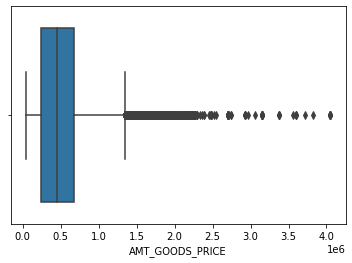

In [38]:
sns.boxplot(CurrentApplication['AMT_GOODS_PRICE'])
plt.show()

In [39]:
CurrentApplication['AMT_GOODS_PRICE'].value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
180000.0     10123
454500.0      9157
1125000.0     9050
135000.0      8206
315000.0      5225
1350000.0     5037
679500.0      4824
238500.0      4696
360000.0      4553
247500.0      4318
463500.0      3873
540000.0      3763
495000.0      3463
202500.0      3222
90000.0       3169
405000.0      2954
472500.0      2828
157500.0      2704
585000.0      2647
337500.0      2501
229500.0      2438
112500.0      2170
630000.0      2164
1800000.0     2146
720000.0      1922
1575000.0     1875
688500.0      1824
292500.0      1708
148500.0      1674
477000.0      1611
810000.0      1568
67500.0       1505
697500.0      1408
382500.0      1396
765000.0      1396
904500.0      1375
283500.0      1372
252000.0      1368
234000.0      1279
45000.0       1169
945000.0      1161
855000.0      1113
1129500.0     1109
913500.0      1065
328500.0      1059
459000.0      1023
193500.0      1007
103500.0    

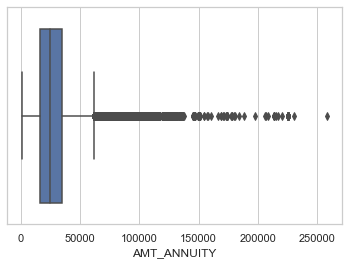

In [176]:
sns.boxplot(CurrentApplication['AMT_ANNUITY'])
plt.show()
# This column has outliers fill the missing values with median with 24903.0

In [177]:
#since amt_goods_price has outliers impute with median which is 45000.0
CurrentApplication['AMT_GOODS_PRICE'].fillna(CurrentApplication['AMT_GOODS_PRICE'].median(), inplace=True)

In [178]:

CurrentApplication['CNT_FAM_MEMBERS'].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [179]:
CurrentApplication['CNT_FAM_MEMBERS'].median()
#mean and median almost smae so check for outliers

2.0

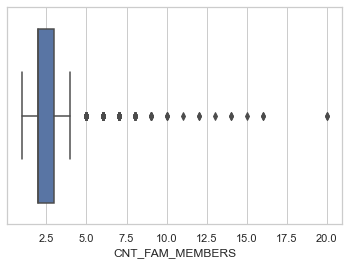

In [180]:
sns.boxplot(CurrentApplication['CNT_FAM_MEMBERS'])
plt.show()
#has outliers so fill with median which is 2.0

In [181]:
CurrentApplication['CNT_FAM_MEMBERS'].fillna(CurrentApplication['CNT_FAM_MEMBERS'].median(), inplace=True)

In [182]:
CurrentApplication['EXT_SOURCE_2'].value_counts()

2.858979e-01    721
2.622584e-01    417
2.652563e-01    343
1.596792e-01    322
2.653117e-01    306
2.665198e-01    244
2.631436e-01    243
1.621446e-01    238
1.621921e-01    234
1.631870e-01    184
1.604053e-01    173
1.915259e-01    169
2.453496e-01    167
3.542247e-01    149
1.942664e-01    140
1.923161e-01    131
3.572820e-01    129
1.942151e-01    127
1.953538e-01    123
3.551256e-01    113
3.411229e-01    110
2.556162e-01     92
3.585685e-01     90
2.930897e-01     85
2.620553e-01     84
3.441915e-01     84
3.573422e-01     81
2.547600e-01     80
3.420278e-01     73
2.961436e-01     72
2.007754e-01     71
3.442507e-01     69
1.542654e-01     67
3.454859e-01     67
2.290030e-01     67
2.962028e-01     67
2.746463e-01     66
2.598076e-01     64
2.974306e-01     64
3.102603e-01     61
2.629359e-01     61
2.533716e-01     59
1.548483e-01     59
2.650476e-01     59
2.563408e-01     58
5.806869e-01     57
2.632411e-01     56
6.019534e-01     55
1.535706e-01     55
6.156443e-01     54


In [183]:
CurrentApplication['EXT_SOURCE_2'].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [184]:
CurrentApplication['EXT_SOURCE_2'].median()

0.5659614260608526

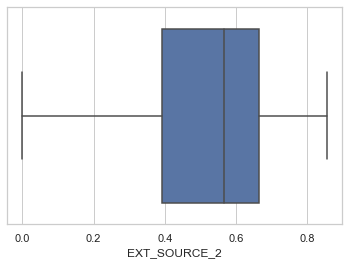

In [185]:
#check for outliers
sns.boxplot(CurrentApplication['EXT_SOURCE_2'])
plt.show()
#no outliers can fill missing values with mean

In [186]:
CurrentApplication['EXT_SOURCE_2'].fillna(CurrentApplication['EXT_SOURCE_2'].mean(), inplace=True)

In [187]:
CurrentApplication['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [188]:
#above is categorical value so fill missing values with mode
CurrentApplication['OCCUPATION_TYPE'].mode()

0    Laborers
dtype: object

In [189]:
CurrentApplication['OCCUPATION_TYPE'].fillna(CurrentApplication['OCCUPATION_TYPE'].mode()[0], inplace=True)

In [190]:
CurrentApplication['OCCUPATION_TYPE'].isna().sum()

0

In [191]:
#count the missing values again
CurrentApplication.isnull().sum().sort_values(ascending=False)

FLOORSMAX_MEDI                  153020
FLOORSMAX_AVG                   153020
FLOORSMAX_MODE                  153020
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BEGINEXPLUATATION_MODE    150007
YEARS_BEGINEXPLUATATION_MEDI    150007
TOTALAREA_MODE                  148431
EMERGENCYSTATE_MODE             145755
EXT_SOURCE_3                     60965
AMT_REQ_CREDIT_BUREAU_YEAR       41519
AMT_REQ_CREDIT_BUREAU_MON        41519
AMT_REQ_CREDIT_BUREAU_HOUR       41519
AMT_REQ_CREDIT_BUREAU_QRT        41519
AMT_REQ_CREDIT_BUREAU_WEEK       41519
AMT_REQ_CREDIT_BUREAU_DAY        41519
DEF_30_CNT_SOCIAL_CIRCLE          1021
OBS_60_CNT_SOCIAL_CIRCLE          1021
DEF_60_CNT_SOCIAL_CIRCLE          1021
OBS_30_CNT_SOCIAL_CIRCLE          1021
AMT_ANNUITY                         12
DAYS_LAST_PHONE_CHANGE               1
WEEKDAY_APPR_PROCESS_START           0
EXT_SOURCE_2                         0
ORGANIZATION_TYPE                    0
LIVE_CITY_NOT_WORK_CITY              0
REG_CITY_NOT_WORK_CITY   

# 4) Check for errors in data types

In [192]:
CurrentApplication.select_dtypes('object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')

In [193]:
CurrentApplication.select_dtypes('float').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG',
       'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [194]:
CurrentApplication.select_dtypes('int64').columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY'],
      dtype='object')

In [195]:
CurrentApplication.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)
# lots of flag variables, upon checking them some are in Y,N format and other in 0,1 so make everything Y,N

SK_ID_CURR                     307511
TARGET                              2
CNT_CHILDREN                       15
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_ID_PUBLISH                  6168
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
HOUR_APPR_PROCESS_START            24
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
dtype: int64

In [196]:
CurrentApplication.select_dtypes('int64').columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY'],
      dtype='object')

### 4.1) Check for negative values

In [197]:
# Checking the values present in columns starting with 'DAYS'. and convert to positive use abs()
print(CurrentApplication['DAYS_BIRTH'].unique())
print(CurrentApplication['DAYS_EMPLOYED'].unique())
print(CurrentApplication['DAYS_REGISTRATION'].unique())
print(CurrentApplication['DAYS_ID_PUBLISH'].unique())
print(CurrentApplication['DAYS_LAST_PHONE_CHANGE'].unique())

[ -9461 -16765 -19046 ...  -7951  -7857 -25061]
[  -637  -1188   -225 ... -12971 -11084  -8694]
[ -3648.  -1186.  -4260. ... -16396. -14558. -14798.]
[-2120  -291 -2531 ... -6194 -5854 -6211]
[-1134.  -828.  -815. ... -3988. -3899. -3538.]


In [198]:
#function to convert days cols to positive
cols_positive = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']
CurrentApplication[cols_positive] = CurrentApplication[cols_positive].abs()  

In [199]:
# Add AGE col , convert the days of birth to age and set to int since the division results in float
CurrentApplication['AGE']= (CurrentApplication['DAYS_BIRTH']/365).astype(int)
CurrentApplication['AGE'].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

### 4.2) Check for XNA values

In [200]:
CurrentApplication.CODE_GENDER.value_counts()
# Drop the 4 XNA values because there is a min amt and there is not enough data to support that
CurrentApplication = CurrentApplication[CurrentApplication['CODE_GENDER']!='XNA']

In [201]:
CurrentApplication.ORGANIZATION_TYPE.value_counts()
# we cant drop it like previously due to the large number replace with NaN

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11192
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6879
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3277
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [202]:
# Replacing XNA with NaN
CurrentApplication = CurrentApplication.replace('XNA',np.NaN)
CurrentApplication.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11192
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6879
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3277
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

# 5) Binning Continous Variables 
#### cols of interest are: Days of Birth, AMT_INCOME_TOTAL, AMT_CREDIT

In [203]:
# Creating A new categorical variable based on income total and binning it appropriately
CurrentApplication['INCOME_GROUP']=pd.qcut(CurrentApplication['AMT_INCOME_TOTAL'], q=[0,0.1,0.3,0.6,0.8,1],labels=['Very Low','Low','Medium','High','Very High'])
CurrentApplication['INCOME_GROUP'].head(20)

0          High
1     Very High
2      Very Low
3        Medium
4        Medium
5           Low
6          High
7     Very High
8           Low
9        Medium
10          Low
11     Very Low
12     Very Low
13         High
14         High
15       Medium
16          Low
17     Very Low
18          Low
19          Low
Name: INCOME_GROUP, dtype: category
Categories (5, object): ['Very Low' < 'Low' < 'Medium' < 'High' < 'Very High']

In [204]:
CurrentApplication['AMT_CREDIT'].quantile([0,0.1,0.3,0.6,0.8,1])

0.0      45000.0
0.1     180000.0
0.3     306306.0
0.6     604152.0
0.8     900000.0
1.0    4050000.0
Name: AMT_CREDIT, dtype: float64

In [205]:
# Creating A new categorical variable based on credit amount and binning it appropriately
CurrentApplication['Credit_Amount']=pd.qcut(CurrentApplication['AMT_CREDIT'], q=[0,0.1,0.3,0.6,0.8,1],labels=['Very Low','Low','Medium','High','Very High'])
CurrentApplication['Credit_Amount'].head(20)

0        Medium
1     Very High
2      Very Low
3        Medium
4        Medium
5        Medium
6     Very High
7     Very High
8     Very High
9        Medium
10         High
11     Very Low
12     Very Low
13    Very High
14         High
15          Low
16       Medium
17          Low
18     Very Low
19       Medium
Name: Credit_Amount, dtype: category
Categories (5, object): ['Very Low' < 'Low' < 'Medium' < 'High' < 'Very High']

In [206]:
# Binning the Age group
CurrentApplication['AGE_GROUP'] = pd.cut(CurrentApplication['AGE'],bins=np.arange(20,71,5))

In [207]:
CurrentApplication['AGE_GROUP'].value_counts().sort_values(ascending=True)

(65, 70]     5009
(20, 25]    16317
(60, 65]    24359
(55, 60]    32722
(45, 50]    34404
(50, 55]    35096
(25, 30]    36486
(30, 35]    39437
(40, 45]    39997
(35, 40]    43679
Name: AGE_GROUP, dtype: int64

# 5) Target Imbalance

In [208]:
CurrentApplication.TARGET.value_counts()

0    282682
1     24825
Name: TARGET, dtype: int64

In [209]:
CurrentApplication.TARGET.value_counts(normalize=True)

0    0.91927
1    0.08073
Name: TARGET, dtype: float64

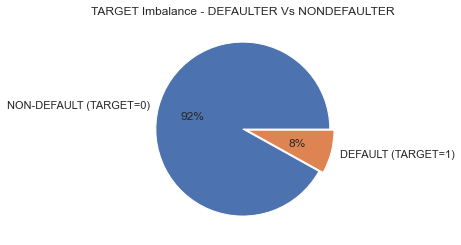

In [210]:
plt.pie(CurrentApplication['TARGET'].value_counts(normalize=True)*100,labels=['NON-DEFAULT (TARGET=0)','DEFAULT (TARGET=1)'],explode=(0,0.05),autopct='%1.f%%')
plt.title('TARGET Imbalance - DEFAULTER Vs NONDEFAULTER')
plt.show()

##### 92% of people have not defaulted as opposed to 8% who have defaulted on their payment

In [302]:
# Dividing the dataset for target=1(client with payment difficulties) and target=0(all other)

CA_Target0=CurrentApplication.loc[CurrentApplication["TARGET"]==0]
CA_Target1=CurrentApplication.loc[CurrentApplication["TARGET"]==1]

In [212]:
# Categorical columns

list(set(CurrentApplication.columns) - set(CurrentApplication.describe().columns))


['WEEKDAY_APPR_PROCESS_START',
 'INCOME_GROUP',
 'Credit_Amount',
 'NAME_INCOME_TYPE',
 'NAME_TYPE_SUITE',
 'NAME_CONTRACT_TYPE',
 'NAME_HOUSING_TYPE',
 'FLAG_OWN_REALTY',
 'NAME_EDUCATION_TYPE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'EMERGENCYSTATE_MODE',
 'NAME_FAMILY_STATUS',
 'FLAG_OWN_CAR',
 'AGE_GROUP',
 'CODE_GENDER']

In [213]:
# of these the most intersting for us to look at is as follows:

cat_cols = ['NAME_TYPE_SUITE',
 'ORGANIZATION_TYPE',
 'NAME_FAMILY_STATUS',
 'OCCUPATION_TYPE',
 'NAME_HOUSING_TYPE',
 'FLAG_OWN_REALTY',
 'WEEKDAY_APPR_PROCESS_START',
 'AGE_GROUP',
 'NAME_EDUCATION_TYPE',
 'NAME_CONTRACT_TYPE',
 'INCOME_GROUP',
 'NAME_INCOME_TYPE',
 'FLAG_OWN_CAR',
 'EMERGENCYSTATE_MODE',
 'Credit_Amount',
 'CODE_GENDER'],

# Perform univariate analysis on categorical columns

In [214]:
def plotting(train, train0, train1, column):
    
    train = train
    train_0 = train0
    train_1 = train1
    col = column
    
    fig = plt.figure(figsize=(13,10))
    
    ax1 = plt.subplot(221)
    train[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)
    
    ax2 = plt.subplot(222)
    sns.countplot(x= column, hue='TARGET', data = train, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')


    ax3 = plt.subplot(223)
    df = pd.DataFrame()
    df['0']= ((train_0[col].value_counts())/len(train_0))*100
    df['1']= ((train_1[col].value_counts())/len(train_1))*100
    df.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage')


    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()
      
       
      

In [215]:
CurrentApplication.shape

(307507, 65)

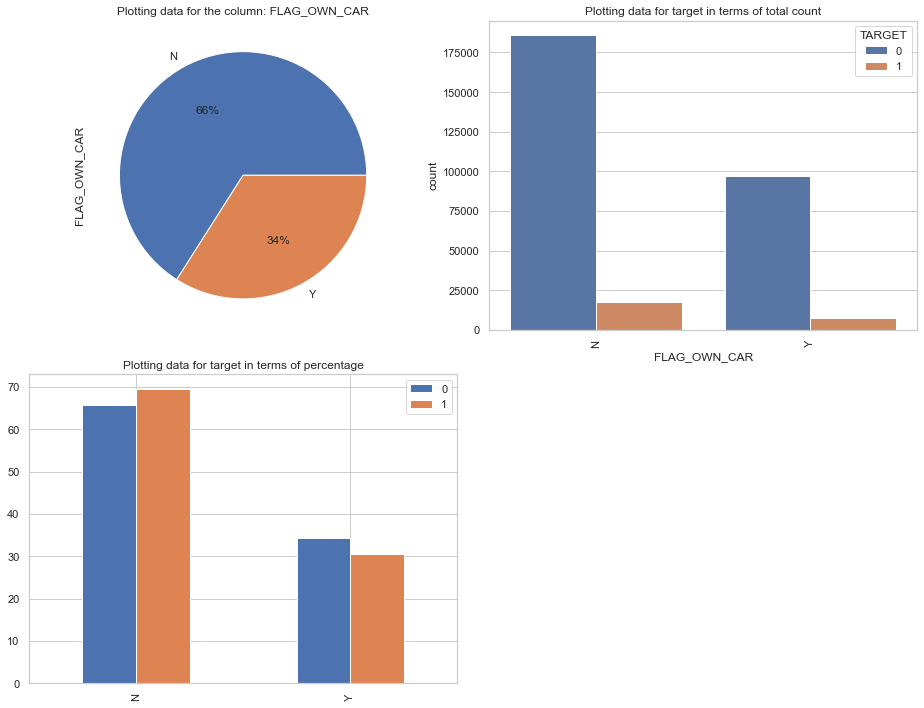

In [216]:
plotting(CurrentApplication,CA_Target0,CA_Target1,'FLAG_OWN_CAR')

Around 70% of defaulters dont own a car and around 30% of people default who do own a car so rate of default for people who own a car is lower than those who dont

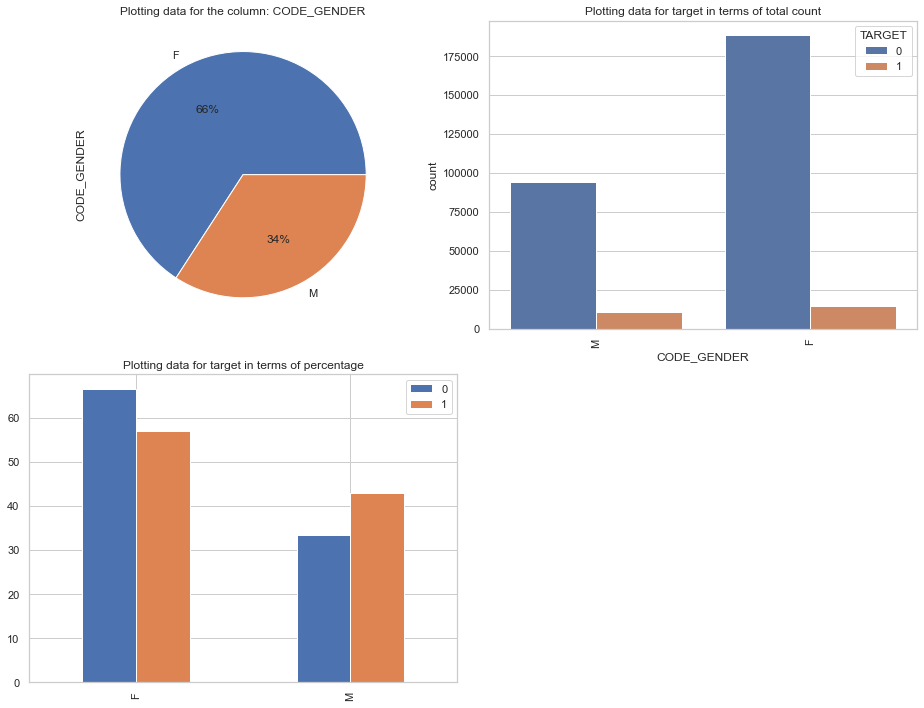

In [217]:

plotting(CurrentApplication,CA_Target0,CA_Target1,'CODE_GENDER')


We can see that Female contribute more than 60% to the non-defaulters while areoun 50% to the defaulters. We can conclude that
We see more female applying for loans than males and hence the more number of female defaulters as well.
Males apply for less loans but default more

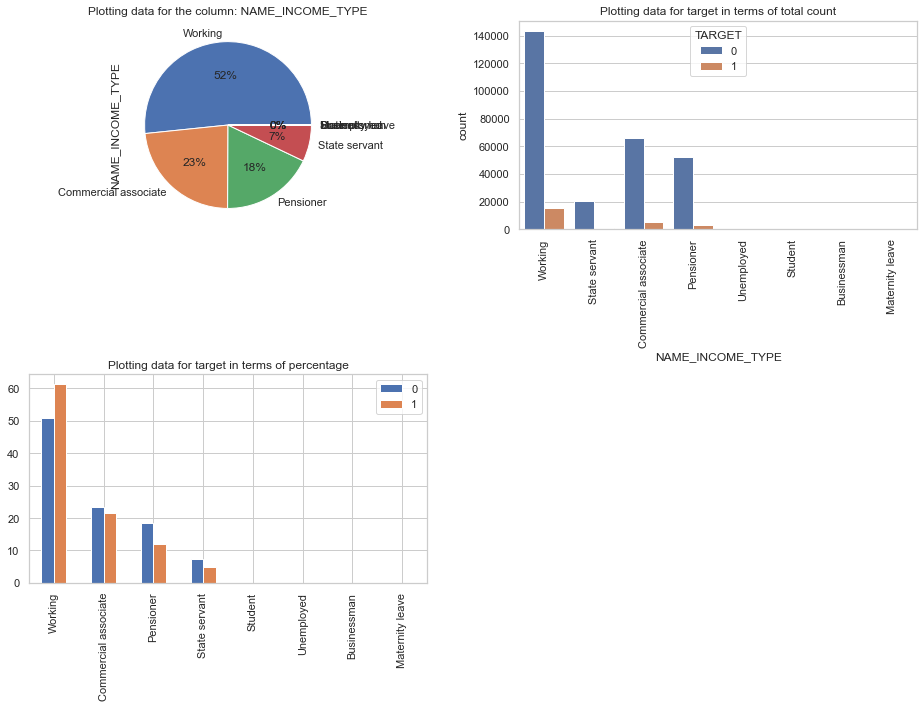

In [218]:
plotting(CurrentApplication,CA_Target0,CA_Target1,'NAME_INCOME_TYPE')

People who work default the most and the least are state servant and pensioners as opposed to the loans they take

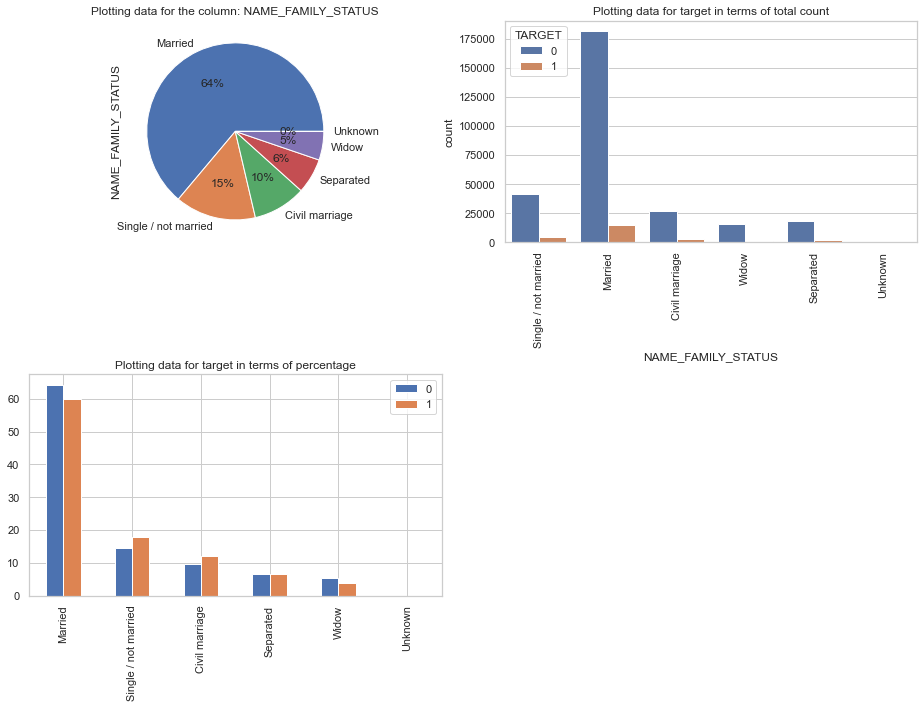

In [219]:
plotting(CurrentApplication,CA_Target0,CA_Target1,'NAME_FAMILY_STATUS')

Married people applied for the most loans but single/not married people default rate is higher compared to the loans they applied same with civil marraige

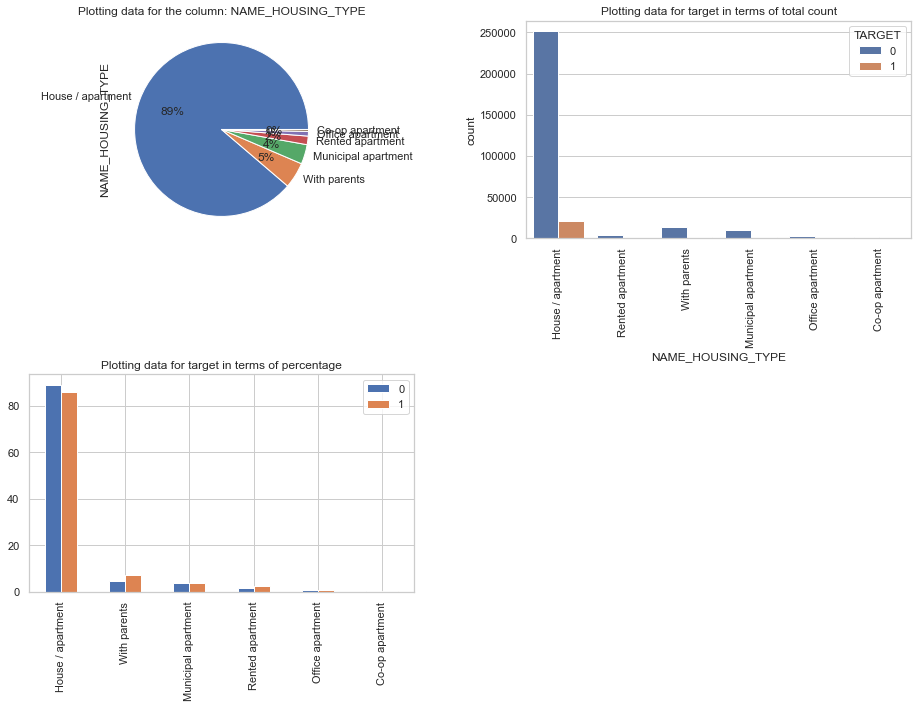

In [220]:
plotting(CurrentApplication,CA_Target0,CA_Target1,'NAME_HOUSING_TYPE')

People living with parents tend to default the most even though they took lower percentage of loans

## Univariate categorical ordered analysis

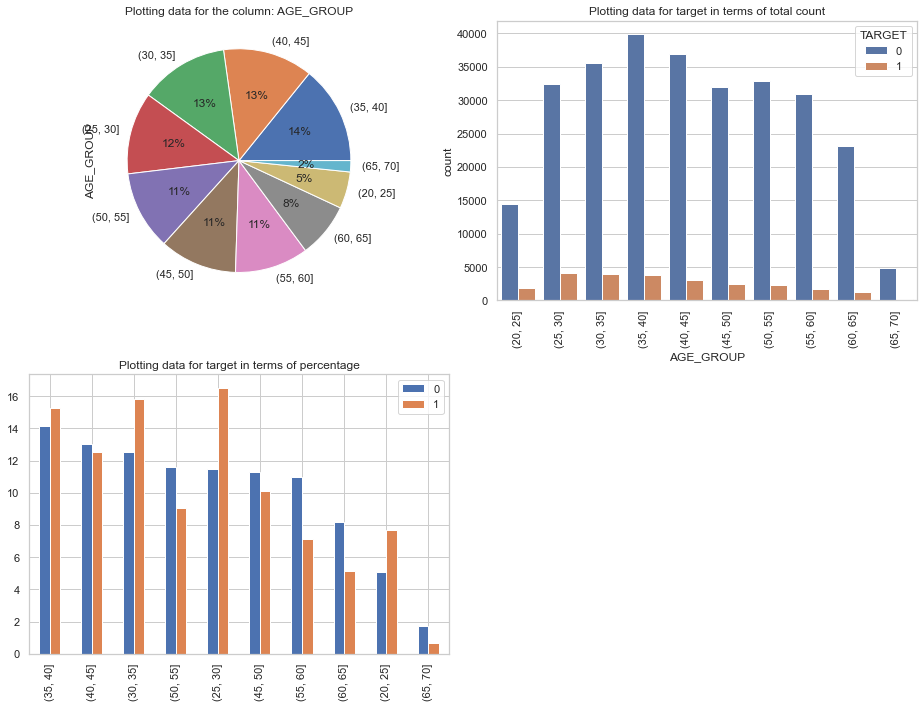

In [221]:
plotting(CurrentApplication,CA_Target0,CA_Target1,'AGE_GROUP')

riskiest age group is between 25-30 they defaulted more. the higher the age lower the defaults due to job stability

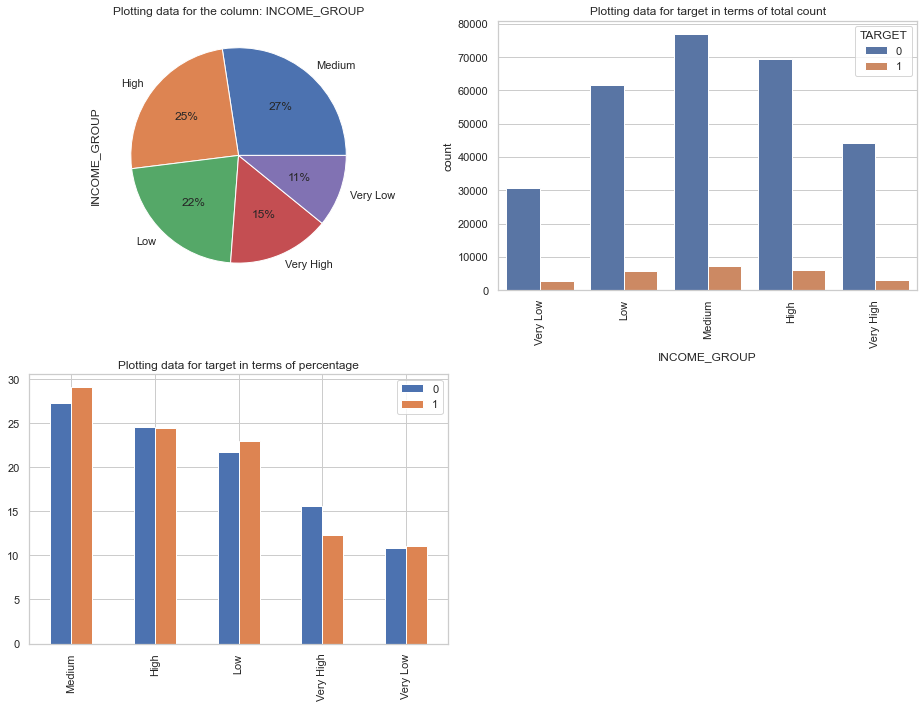

In [222]:
plotting(CurrentApplication,CA_Target0,CA_Target1,'INCOME_GROUP')

Medium income groups defaulted the most so did the low income group but only slightly

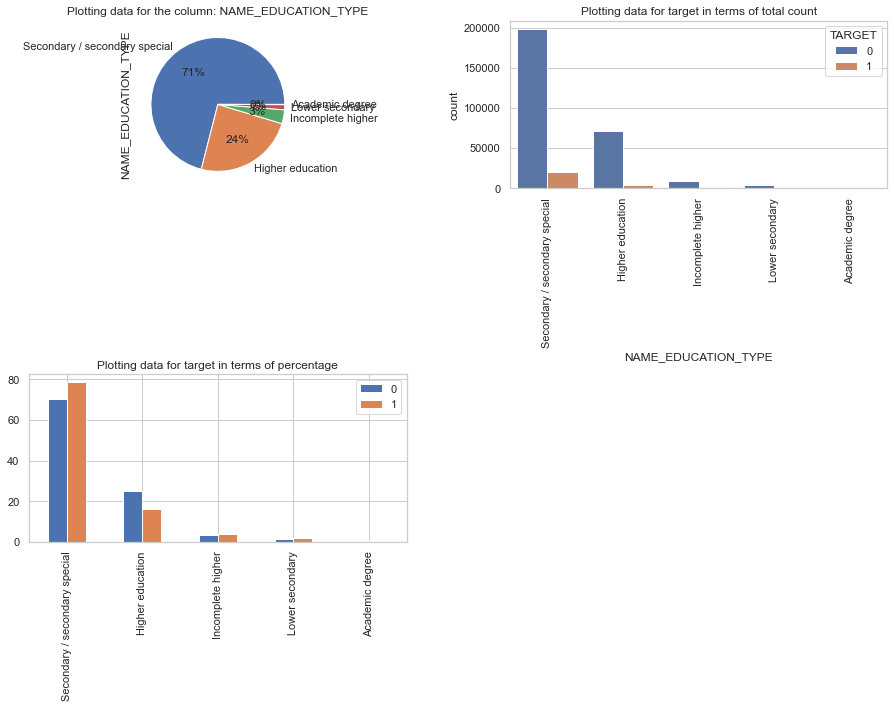

In [223]:
plotting(CurrentApplication,CA_Target0,CA_Target1,'NAME_EDUCATION_TYPE')

people with secondary education defaulted the most and the lowest is people with academic degreess

people borrowing from regions with rating 3 tend to default the most

people who lived with parents defaulted higher than those who own or rent

## Univariate analysis and outliers for Numerical cols

In [224]:
#Numerical columns
CurrentApplication.describe().columns


Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
      

In [225]:
#num_cols of interest

num_cols = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS']
       

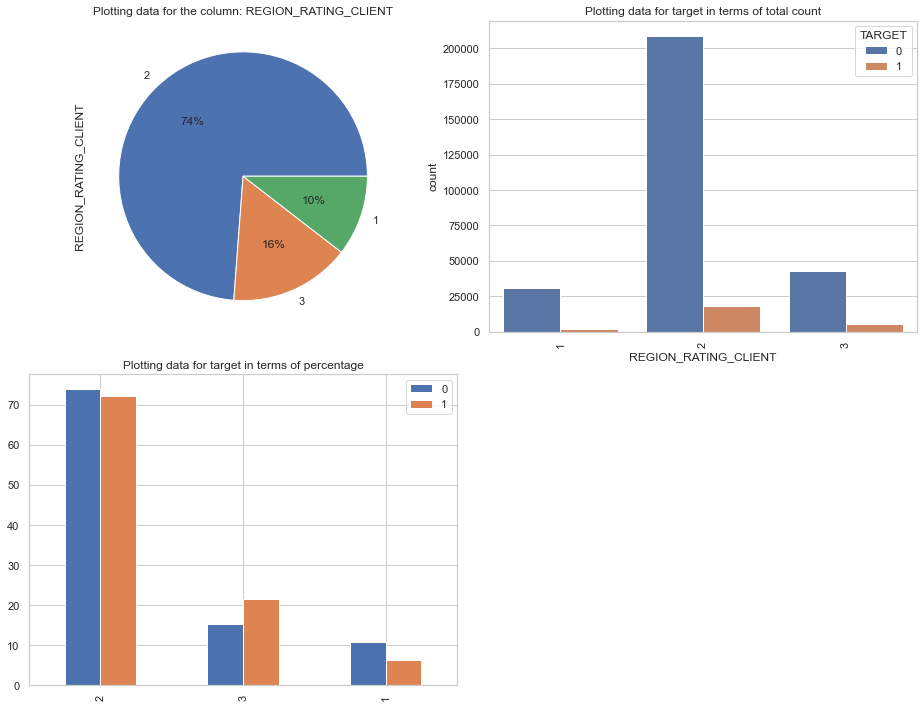

In [226]:
plotting(CurrentApplication,CA_Target0,CA_Target1,'REGION_RATING_CLIENT')

Box Plot for  SK_ID_CURR


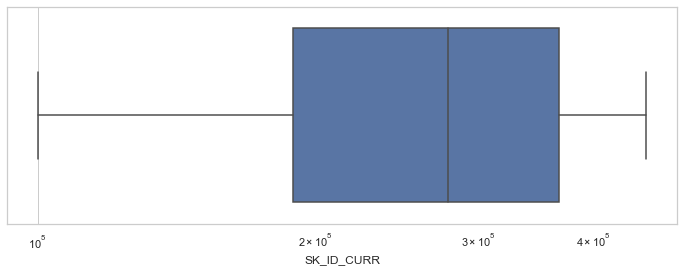


Box Plot for  TARGET


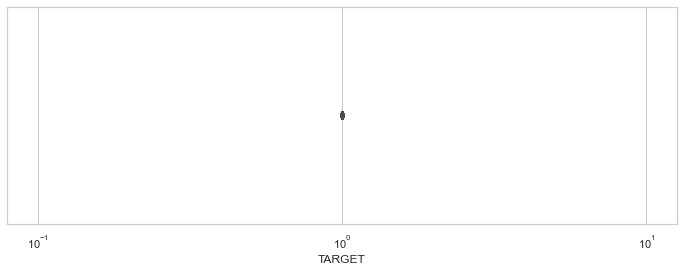


Box Plot for  CNT_CHILDREN


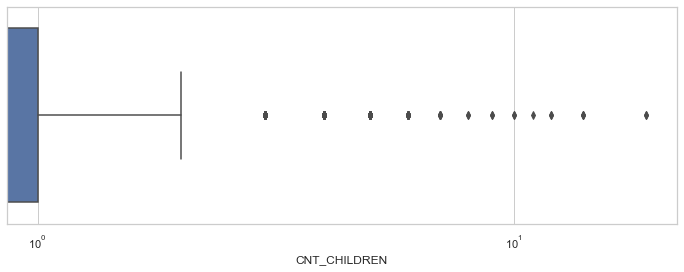


Box Plot for  AMT_INCOME_TOTAL


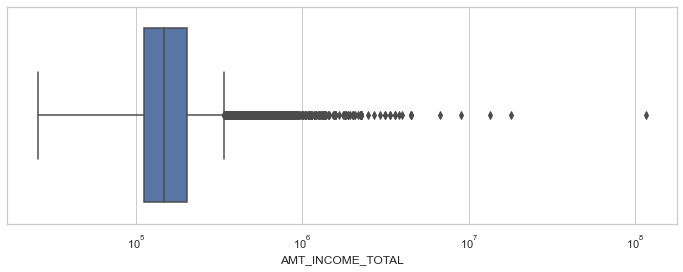


Box Plot for  AMT_CREDIT


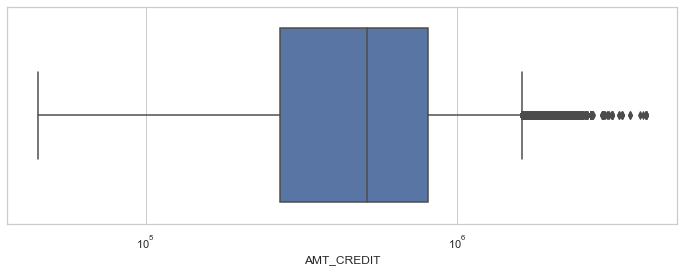


Box Plot for  AMT_ANNUITY


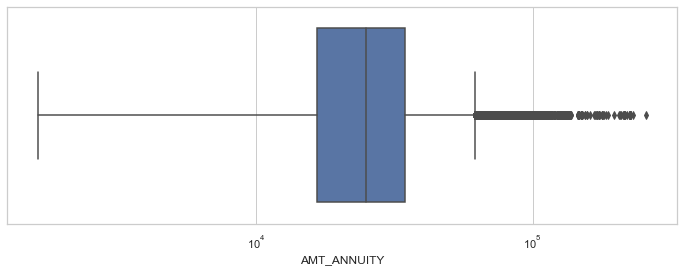


Box Plot for  AMT_GOODS_PRICE


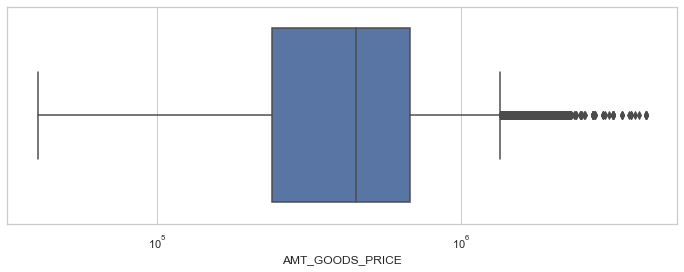


Box Plot for  REGION_POPULATION_RELATIVE


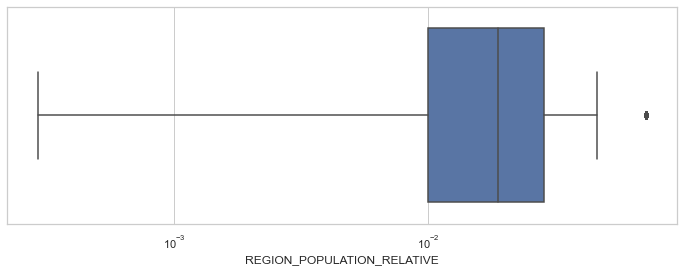


Box Plot for  DAYS_BIRTH


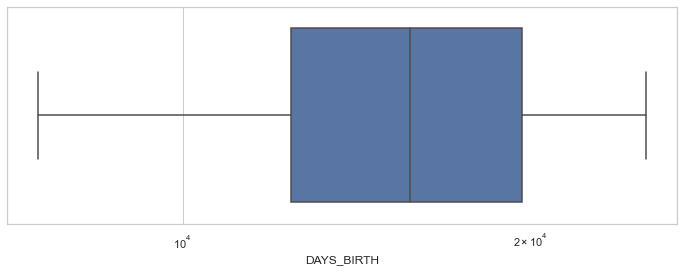


Box Plot for  DAYS_EMPLOYED


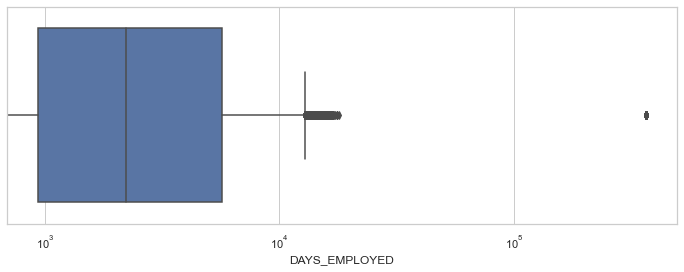


Box Plot for  DAYS_REGISTRATION


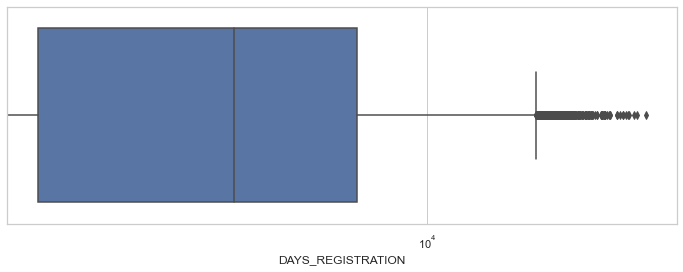


Box Plot for  DAYS_ID_PUBLISH


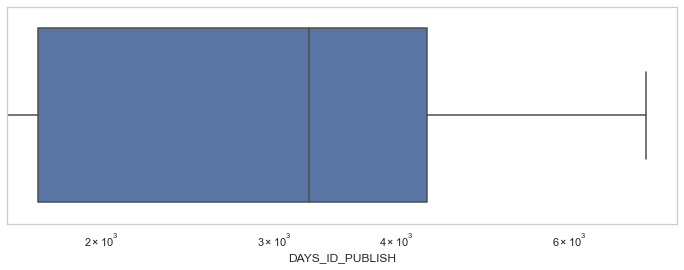


Box Plot for  FLAG_MOBIL


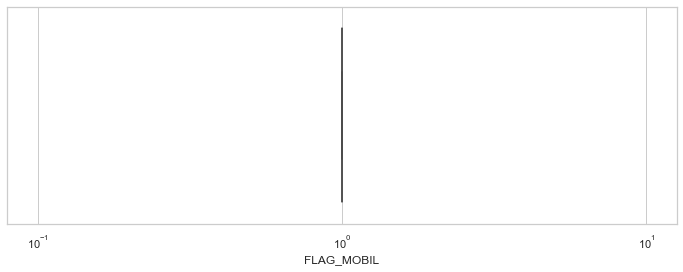


Box Plot for  FLAG_EMP_PHONE


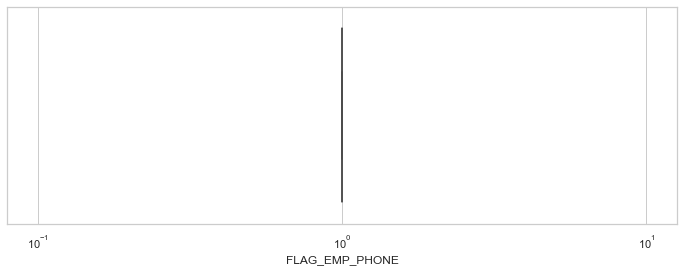


Box Plot for  FLAG_WORK_PHONE


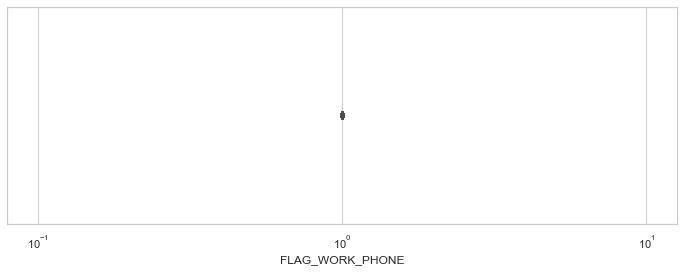


Box Plot for  FLAG_CONT_MOBILE


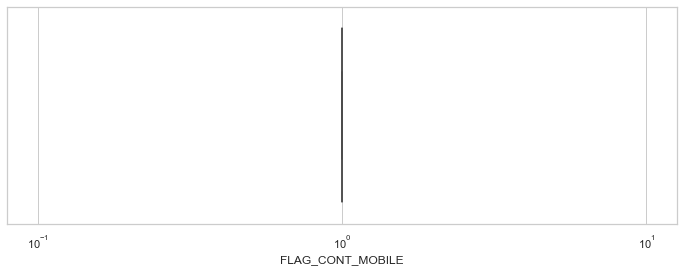


Box Plot for  FLAG_PHONE


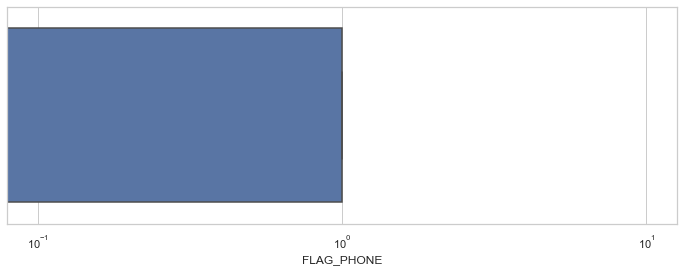


Box Plot for  FLAG_EMAIL


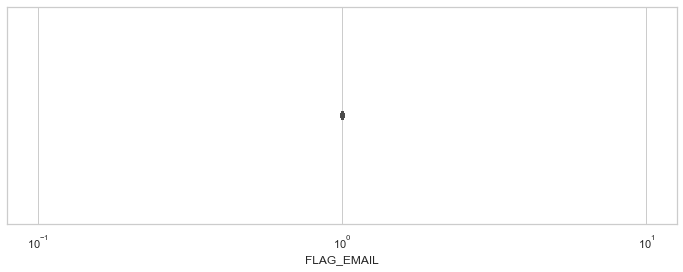


Box Plot for  CNT_FAM_MEMBERS


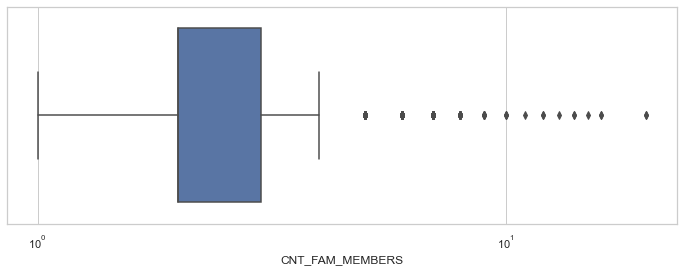


Box Plot for  REGION_RATING_CLIENT


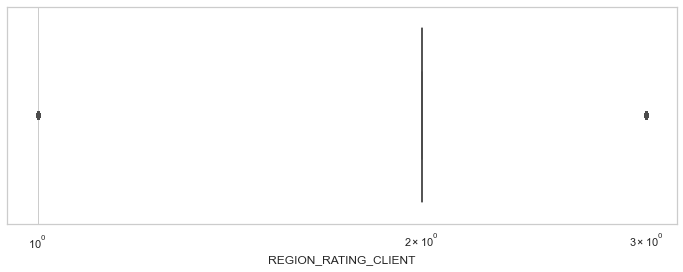


Box Plot for  REGION_RATING_CLIENT_W_CITY


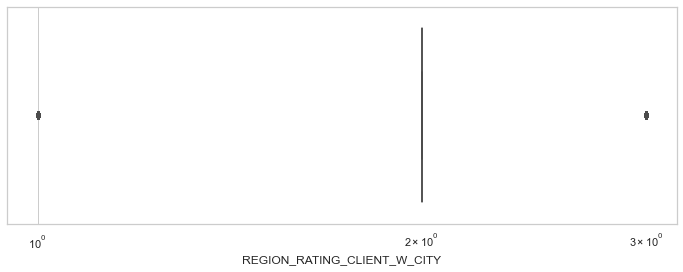


Box Plot for  HOUR_APPR_PROCESS_START


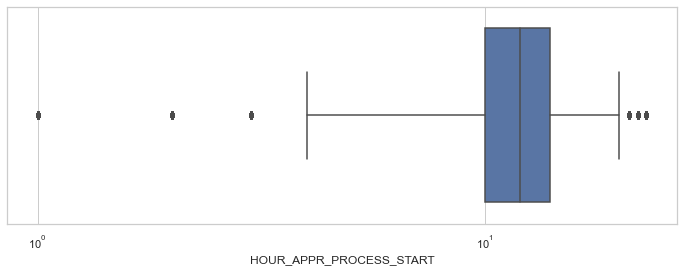


Box Plot for  REG_REGION_NOT_LIVE_REGION


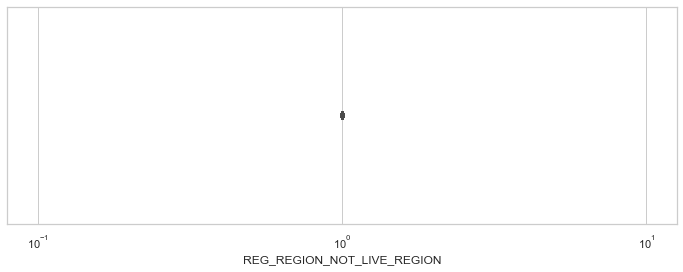


Box Plot for  REG_REGION_NOT_WORK_REGION


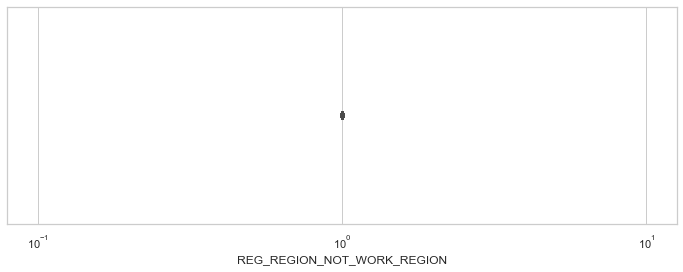


Box Plot for  LIVE_REGION_NOT_WORK_REGION


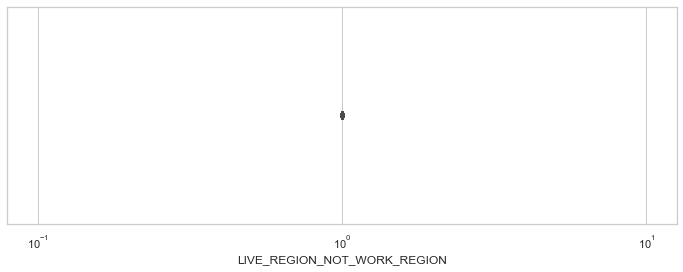


Box Plot for  REG_CITY_NOT_LIVE_CITY


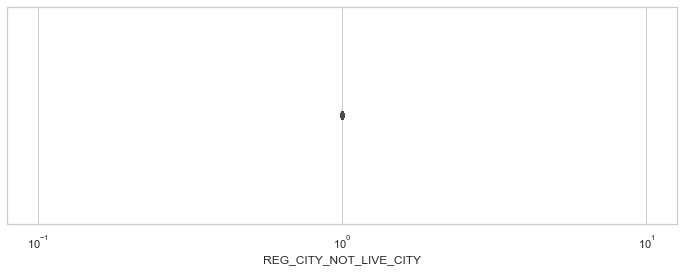


Box Plot for  REG_CITY_NOT_WORK_CITY


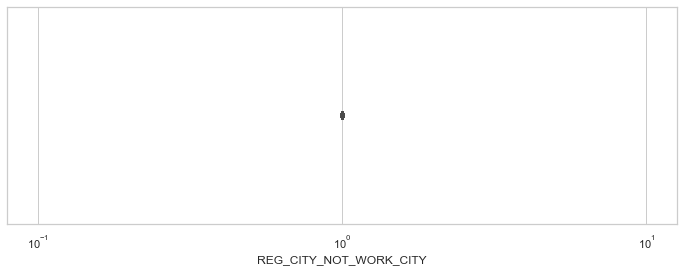


Box Plot for  LIVE_CITY_NOT_WORK_CITY


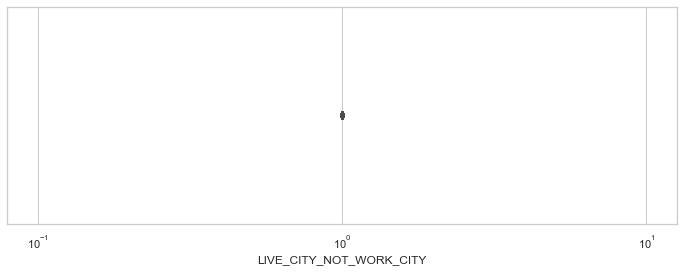


Box Plot for  EXT_SOURCE_2


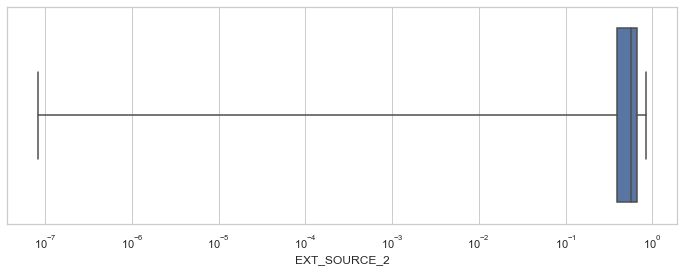


Box Plot for  EXT_SOURCE_3


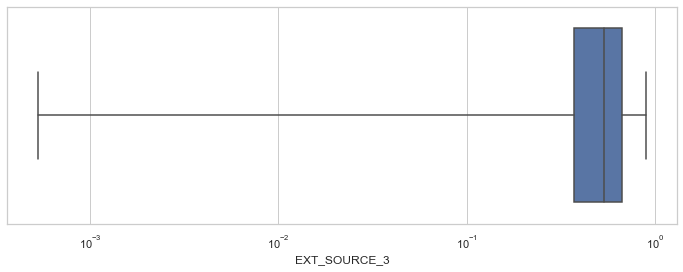


Box Plot for  YEARS_BEGINEXPLUATATION_AVG


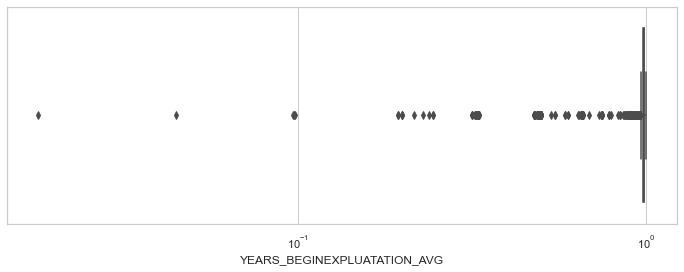


Box Plot for  FLOORSMAX_AVG


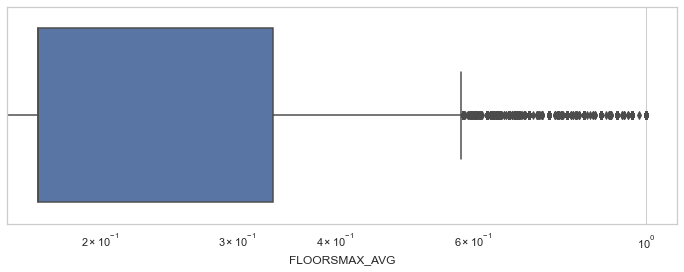


Box Plot for  YEARS_BEGINEXPLUATATION_MODE


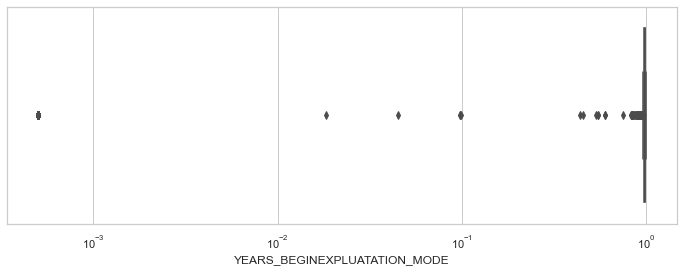


Box Plot for  FLOORSMAX_MODE


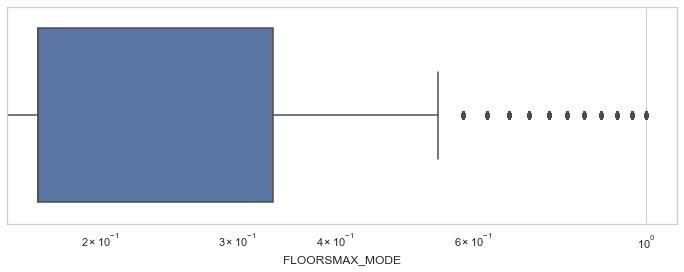


Box Plot for  YEARS_BEGINEXPLUATATION_MEDI


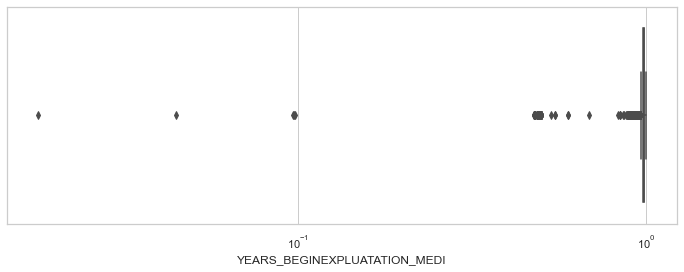


Box Plot for  FLOORSMAX_MEDI


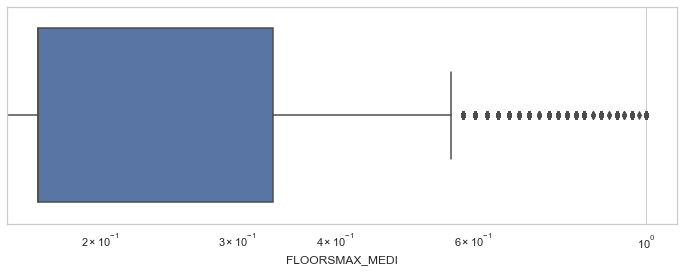


Box Plot for  TOTALAREA_MODE


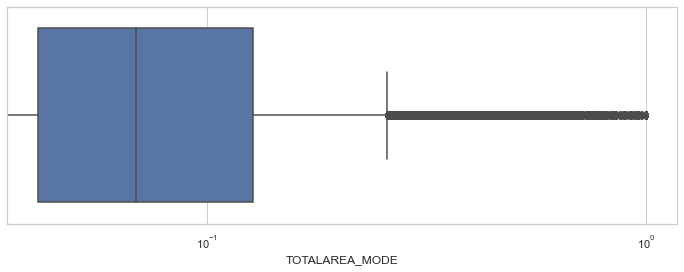


Box Plot for  OBS_30_CNT_SOCIAL_CIRCLE


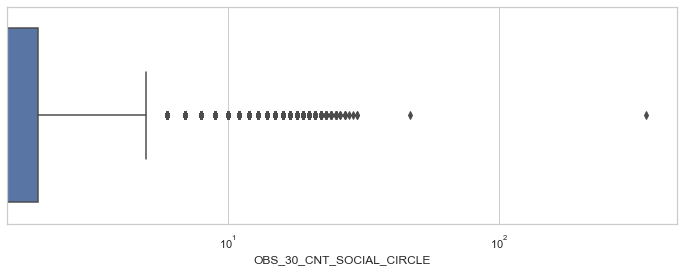


Box Plot for  DEF_30_CNT_SOCIAL_CIRCLE


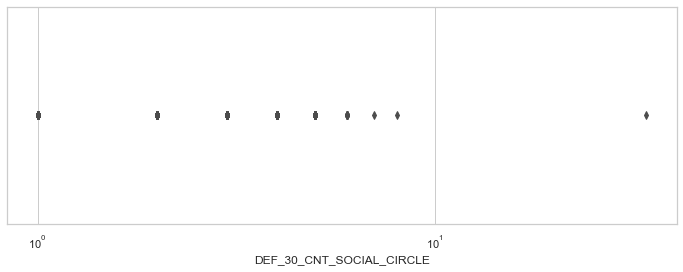


Box Plot for  OBS_60_CNT_SOCIAL_CIRCLE


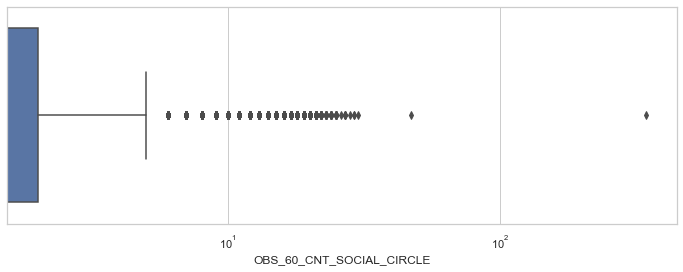


Box Plot for  DEF_60_CNT_SOCIAL_CIRCLE


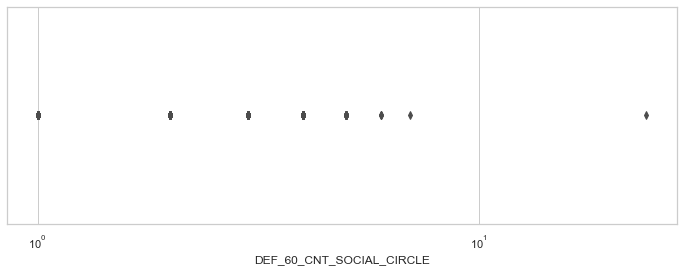


Box Plot for  DAYS_LAST_PHONE_CHANGE


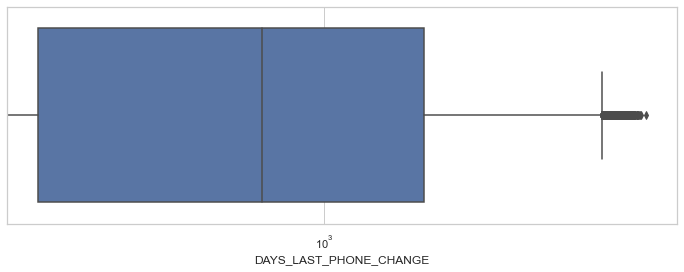


Box Plot for  AMT_REQ_CREDIT_BUREAU_HOUR


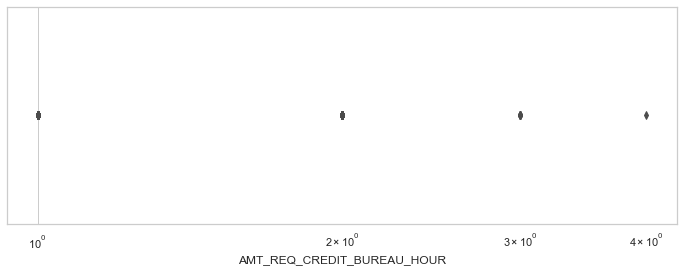


Box Plot for  AMT_REQ_CREDIT_BUREAU_DAY


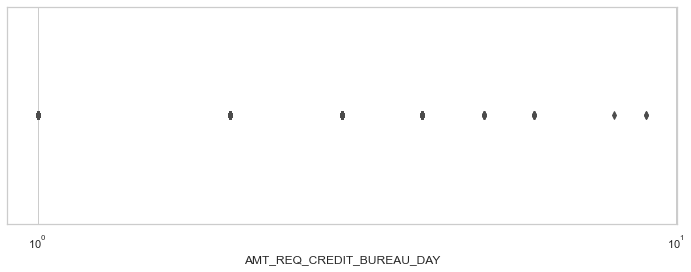


Box Plot for  AMT_REQ_CREDIT_BUREAU_WEEK


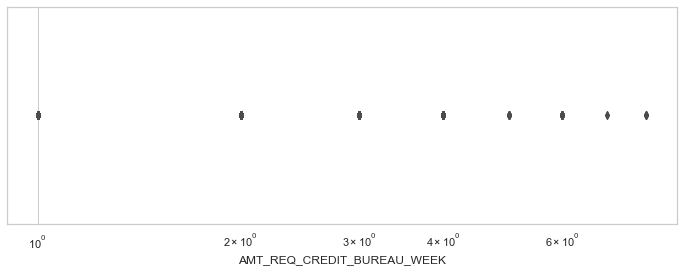


Box Plot for  AMT_REQ_CREDIT_BUREAU_MON


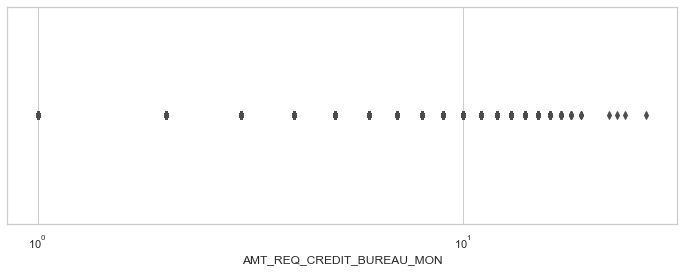


Box Plot for  AMT_REQ_CREDIT_BUREAU_QRT


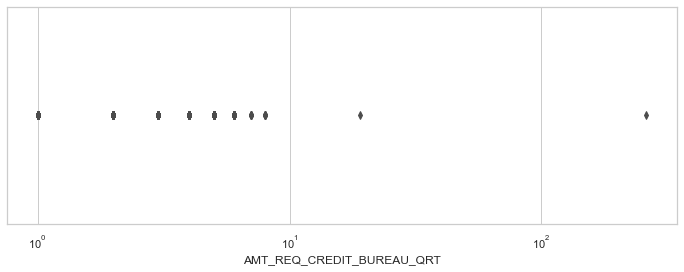


Box Plot for  AMT_REQ_CREDIT_BUREAU_YEAR


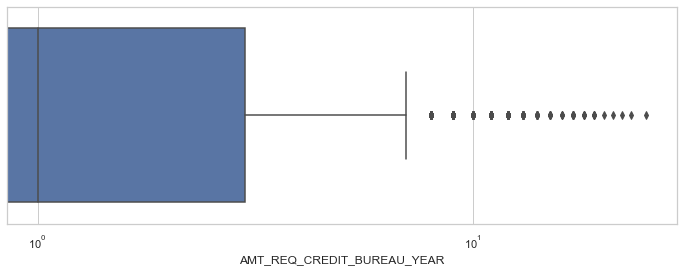


Box Plot for  AGE


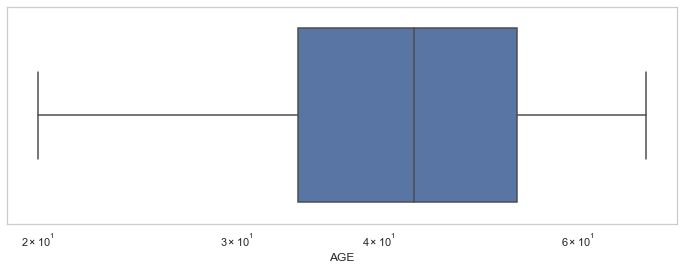

In [122]:
for col in num_cols:
    print('Box Plot for ',col)
    plt.figure(figsize=[12,4])
    sns.set(style='whitegrid')
    plt.xscale('log')
    sns.boxplot(data =CurrentApplication, x=col,orient='v')
    plt.show()
    print()

CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE ,DAYS_EMPLOYED are few columns which has outliers

In [244]:
# calculate interquartile range
q75, q25 = np.percentile(CurrentApplication['AMT_CREDIT'], [75 ,25])
iqr = q75 - q25
# calculate the outlier cutoff
cut_off = iqr * 1.5
# remove outliers
correctedCreditAmt = CurrentApplication[CurrentApplication['AMT_CREDIT'] < cut_off]
correctedIncomeTarget1 = correctedCreditAmt[correctedCreditAmt['TARGET'] == 1]

In [245]:
cut_off

807975.0

In [261]:
iqr

538650.0

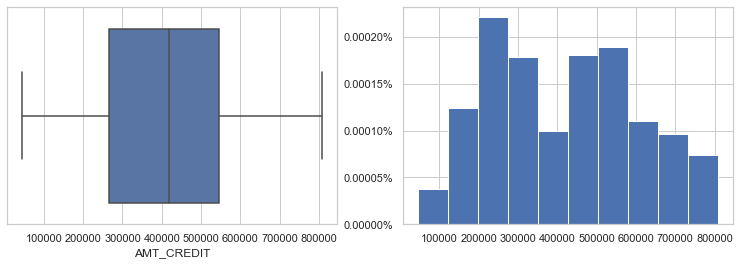

In [248]:
# Plotting the data to see the Loan Amt for defaulters
plt.figure(figsize=[13,4])
plt.subplot(1,2,1)
sns.boxplot(correctedIncomeTarget1['AMT_CREDIT'],orient='v')
plt.subplot(1,2,2)
#plt.hist(x=correctedIncomeTarget1['AMT_CREDIT']);
plt.hist(x=correctedIncomeTarget1['AMT_CREDIT'],density=True, weights=np.ones(len(correctedIncomeTarget1['AMT_CREDIT'])) / len(correctedIncomeTarget1['AMT_CREDIT']))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

Around 50% of people took a loan between 200000 and 600000

In [ ]:
#CA_Target1[(CA_Target1['AMT_CREDIT'] > 200000) & (CA_Target1['AMT_CREDIT'] < 600000) ].shape[0]/CA_Target1.shape[0]


In [293]:
# calculate interquartile range
q75, q25 = np.percentile(CurrentApplication['AMT_CREDIT'], [75 ,25])
iqr = q75 - q25
# calculate the outlier cutoff
cut_off_AMT_total = iqr * 1.5
# remove outliers
IncomeAmt = CurrentApplication[CurrentApplication['AMT_INCOME_TOTAL'] < cut_off_AMT_total]
Income_totalTarget1 = IncomeAmt[IncomeAmt['TARGET'] == 1]

In [294]:
cut_off_AMT_total

807975.0

In [287]:
cut_offIncome

135000.0

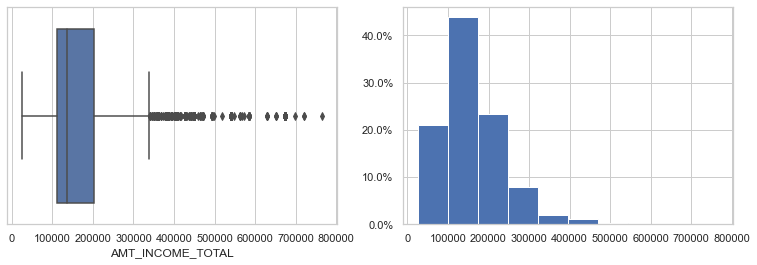

In [295]:
#### Plotting the data to see the Loan Amt for defaulters
plt.figure(figsize=[13,4])
plt.subplot(1,2,1)
sns.boxplot(Income_totalTarget1['AMT_INCOME_TOTAL'])
plt.subplot(1,2,2)
#plt.hist(x=Income_totalTarget1['AMT_INCOME_TOTAL']);
plt.hist(x=Income_totalTarget1['AMT_INCOME_TOTAL'], weights=np.ones(len(Income_totalTarget1['AMT_INCOME_TOTAL'])) / len(Income_totalTarget1['AMT_INCOME_TOTAL']))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

most of the defaulters have the income range between 100000 and 200000

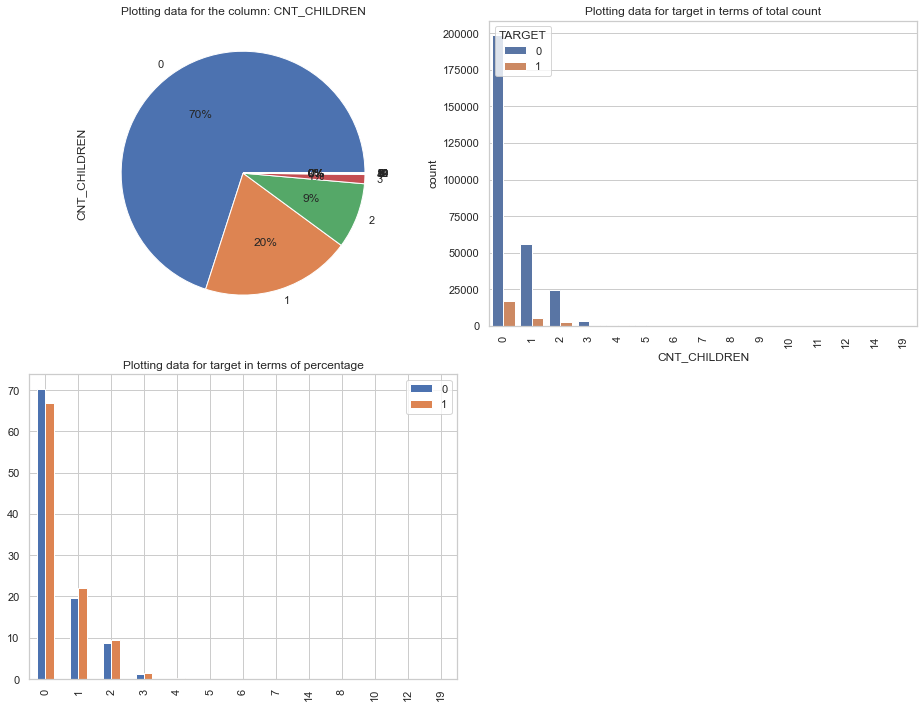

In [296]:

plotting(CurrentApplication,CA_Target0,CA_Target1,'CNT_CHILDREN')

People without children defaulted less

In [297]:
# convert the days employed to years and apply absolute function as its in negative form
# Plotting for days employed col

CurrentApplication['YearsWorked'] = abs(round((CurrentApplication['DAYS_EMPLOYED'].replace('-',''))/365,2)).astype(int)

In [298]:
CurrentApplication['YearsWorked'].value_counts(normalize=True)

1000    0.180072
1       0.103541
2       0.096390
0       0.090572
3       0.081626
4       0.070814
5       0.052961
6       0.048922
7       0.042805
8       0.037238
9       0.029183
10      0.023970
11      0.019199
12      0.017277
14      0.015125
13      0.014130
15      0.008891
16      0.007577
17      0.006536
18      0.006231
19      0.006084
20      0.005210
21      0.004754
22      0.004071
23      0.003314
24      0.002976
25      0.002670
27      0.002133
26      0.002124
28      0.001980
29      0.001847
30      0.001489
31      0.001418
34      0.001187
32      0.001141
33      0.001076
35      0.000832
36      0.000637
37      0.000452
39      0.000406
38      0.000377
41      0.000192
40      0.000192
42      0.000137
44      0.000098
43      0.000062
45      0.000049
46      0.000013
48      0.000013
47      0.000003
49      0.000003
Name: YearsWorked, dtype: float64

In [299]:
#remove outlier
CurrentApplication['YearsWorked'] = CurrentApplication['YearsWorked'].replace(1000,1)

In [300]:
CurrentApplication['YearsWorked'].value_counts(normalize=True)

1     0.283613
2     0.096390
0     0.090572
3     0.081626
4     0.070814
5     0.052961
6     0.048922
7     0.042805
8     0.037238
9     0.029183
10    0.023970
11    0.019199
12    0.017277
14    0.015125
13    0.014130
15    0.008891
16    0.007577
17    0.006536
18    0.006231
19    0.006084
20    0.005210
21    0.004754
22    0.004071
23    0.003314
24    0.002976
25    0.002670
27    0.002133
26    0.002124
28    0.001980
29    0.001847
30    0.001489
31    0.001418
34    0.001187
32    0.001141
33    0.001076
35    0.000832
36    0.000637
37    0.000452
39    0.000406
38    0.000377
40    0.000192
41    0.000192
42    0.000137
44    0.000098
43    0.000062
45    0.000049
46    0.000013
48    0.000013
47    0.000003
49    0.000003
Name: YearsWorked, dtype: float64

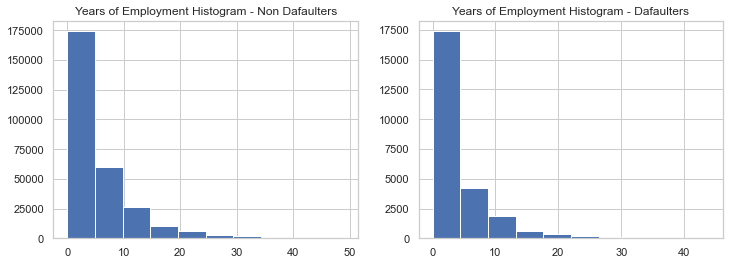

In [303]:
#Plotting the data to see the Years of Employment for Dafaulters and NonDefaulters
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.title("Years of Employment Histogram - Non Dafaulters")
plt.hist(x=CA_Target0['YearsWorked']);
plt.subplot(1,2,2)
plt.title("Years of Employment Histogram - Dafaulters")
plt.hist(x=CA_Target1['YearsWorked']);
plt.show()

People defaulted less in the later parts of their career i.e >10 years

# Bivariate analysis

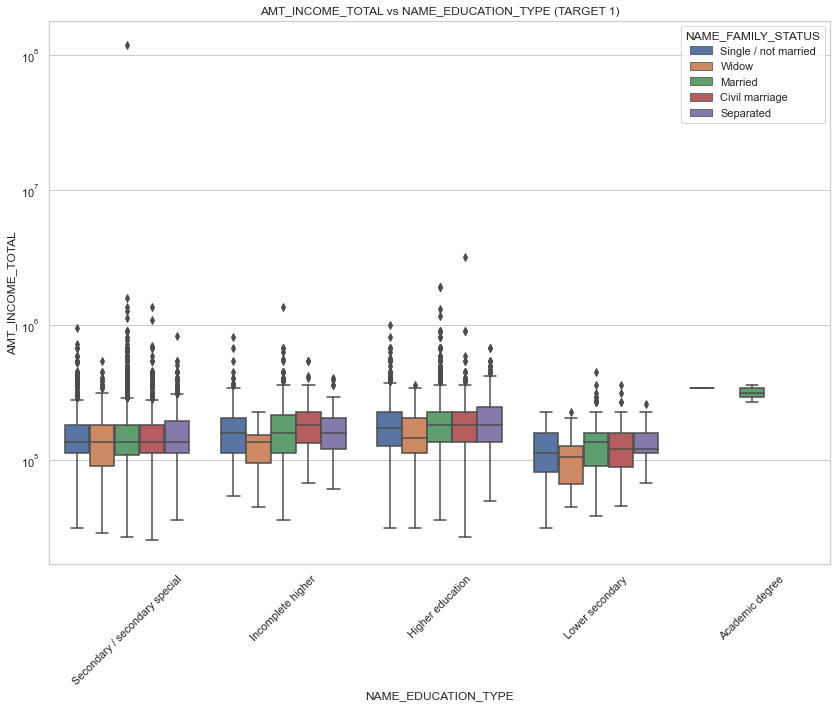

In [330]:
plt.figure(figsize=(14,10))
plt.xticks(rotation=45)
plt.ticklabel_format(style = 'plain')
plt.yscale('log')
fig = sns.boxplot(data =CA_Target1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('AMT_INCOME_TOTAL vs NAME_EDUCATION_TYPE (TARGET 1)')
plt.show()

 Academic degree education type have less outliers and also their amount income total seems to be on higher side. The income range is also about the same. People with lower secondary educatiom have the lowest income

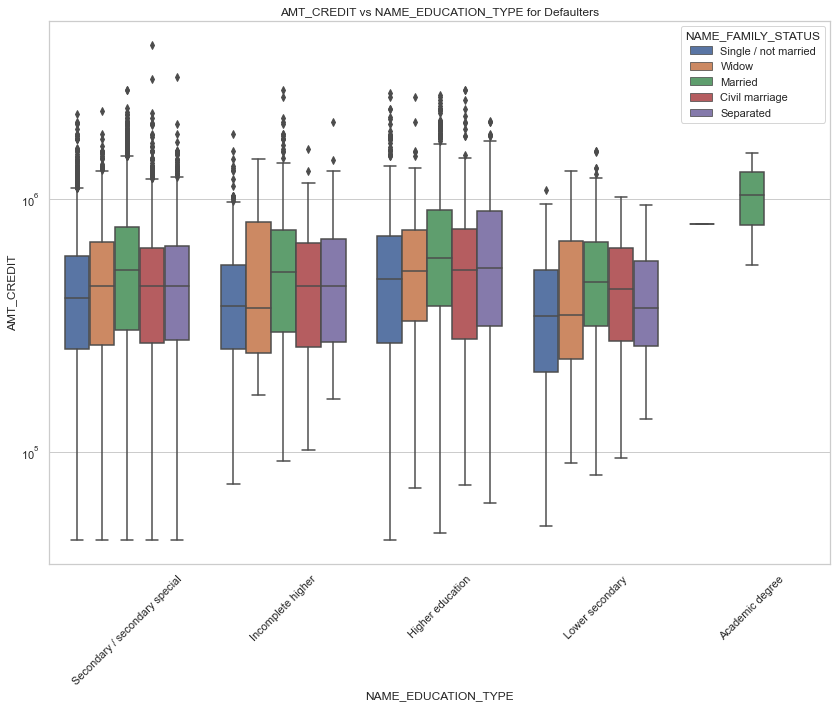

In [331]:
plt.figure(figsize=(14,10))
plt.xticks(rotation=45)
plt.ticklabel_format(style = 'plain')
plt.yscale('log')
sns.boxplot(data =CA_Target1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('AMT_CREDIT vs NAME_EDUCATION_TYPE for Defaulters')
plt.show()

on Average people with lower secondary degree recieved lower amount of credit and Academic degree holders received the highest

# Correlation

In [333]:
#Getting the top 10 correlation for target 0
corr=CA_Target0.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

Column1                   Column2  Correlation  \
1507            FLAG_EMP_PHONE             DAYS_EMPLOYED    -0.999758   
6776          YEARS_BUILD_MEDI           YEARS_BUILD_AVG     0.998522   
8314  OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE     0.998508   
7316            FLOORSMIN_MEDI             FLOORSMIN_AVG     0.997202   
7208            FLOORSMAX_MEDI             FLOORSMAX_AVG     0.997018   
7100            ENTRANCES_MEDI             ENTRANCES_AVG     0.996899   
6992            ELEVATORS_MEDI             ELEVATORS_AVG     0.996161   
6884           COMMONAREA_MEDI            COMMONAREA_AVG     0.995857   
7640           LIVINGAREA_MEDI            LIVINGAREA_AVG     0.995568   
6452           APARTMENTS_MEDI            APARTMENTS_AVG     0.995163   

      Abs_Correlation  
1507         0.999758  
6776         0.998522  
8314         0.998508  
7316         0.997202  
7208         0.997018  
7100         0.996899  
6992         0.996161  
6884         0.995857  
7640         0.995568  
6452         0.995163